In [13]:
from manim import *
import numpy as np
import math as mt
config.media_width = "75%"
config.verbosity = "WARNING"

1. Отражение плоскости относительно прямой $y=kx$

![1](images\1.jpg)

Из геометрических соображений: 
$$
\begin{align}
&\vec{b} = \vec{a} + 2 \vec{c} \\
&\vec{c} = Pr_{\vec{z}} \vec{a} - \vec{a} \\
& \vec{b}  = 2 Pr_{\vec{z}} \vec{a} - \vec{a}
\end{align}
$$
Взяв в качестве вектора z вектор с координатами (1, k) получим такую матрицу: 
$$
\frac{1}{1+k^2}
\begin{pmatrix}
1-k^2 & 2k \\
2k & k^2-1
\end{pmatrix}
$$

In [53]:
def matrix_simmetrical(coefficence:float) -> np.ndarray:
    matrix = np.array(
        [ 
            [1-coefficence**2, 2*coefficence],
            [2*coefficence, coefficence**2-1]
        ]
    ) * 1/(1+coefficence**2)
    return matrix


In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент y=kx
        k=2
        matrix = matrix_simmetrical(k)
        line = FunctionGraph(lambda t: k*t, color=RED)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

2. Отображение всей плоскости в прямую $y = bx \\$

Аналогично предыдущему, получим, что все вектора проектируются на одну прямую.
$$
\begin{pmatrix}
1 & 0 \\
k & 0
\end{pmatrix}
$$

In [55]:
def matrix_project(coefficence : float) -> np.ndarray:
    matrix = np.array(
        [
            [1, 0],
            [coefficence, 0]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент b=kx
        k=2
        matrix = matrix_project(k)
        line = FunctionGraph(lambda t: k*t, color=RED)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

3. Поворот против часовой стрелки на 10с градусов

Построим вектора:


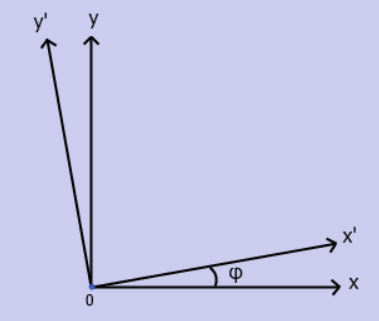

Возьмём произвольный вектор r, получим то его координаты:
$$
\begin{align*}
&x = |r| \cos \alpha \\
&y = |r| \sin \alpha \\
&x' = |r| \cos (\alpha - \phi) = |r| \cos \alpha \cos \phi + |r| \sin \alpha \sin \phi\\ &= x \cos \alpha + y \sin \phi \\
&y' = |r| \sin ( \alpha - \phi) = |r| \sin \alpha \cos \phi - |r| \cos \alpha \sin \phi = y \cos \phi - x \sin \phi \\


&\begin{pmatrix}
\cos \phi  & \sin \phi \\
- \sin \phi & \cos \phi
\end{pmatrix}
\end{align*}
$$

In [68]:
def matrix_rotate10(coefficence : float) -> np.ndarray:
    matrix = np.array(
        [
            [np.cos(np.deg2rad(-10 * coefficence)), np.sin(np.deg2rad(-10 * coefficence))],
            [-np.sin(np.deg2rad(-10 * coefficence)), np.cos(np.deg2rad(-10 * coefficence))]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        #коэффицент c
        k=9
        matrix = matrix_rotate10(k)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane, rate_func=linear), ApplyMatrix(matrix,poly, rate_func=linear))
        self.wait()

4.  Центральная симметрия плоскости относительно начала координат

$$
\begin{pmatrix}
-1 & 0 \\
0 & -1
\end{pmatrix}
$$

In [72]:
def matrix_cent_simmetry() -> np.ndarray:
    matrix = np.array(
        [
            [-1, 0],
            [0, -1]
        ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        matrix = matrix_cent_simmetry()
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()

5. Сначала отражение относительно прямой $y = ax$, потом поворот на $10d$ градусов по часовой стрелке.

$$
\frac{1}{1+k^2}
\begin{pmatrix}
1-k^2 & 2k \\
2k & k^2-1
\end{pmatrix} \begin{pmatrix}
\cos \phi & \sin \phi \\
-\sin \phi & \cos \phi
\end{pmatrix} = \frac{1}{1+k^2} \begin{pmatrix}
(1-k^2)\cos \phi - 2k \sin \phi & 2k\cos \phi - (k^2-1)\sin \phi \\
(1-k^2)\sin \phi+2k\cos \phi & 2k\sin \phi+(k^2-1)\cos \phi
\end{pmatrix}
$$

In [14]:
def matrix_simmetry10_then_rotate(coefficence:float, angle:float) -> np.ndarray:
    angle = np.deg2rad(angle * 10)
    matrix = np.array([
        [(1-coefficence**2)*np.cos(angle)-2*coefficence*np.sin(angle), 2*coefficence*np.cos(angle) - (coefficence**2-1)*np.sin(angle)],
        [(1-coefficence**2)*np.sin(angle)+2*coefficence*np.cos(angle), 2*coefficence*np.sin(angle) + (coefficence**2-1)*np.cos(angle)]
    ])
    return matrix * 1/(1+coefficence**2)

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        k = 2
        angle=2
        matrix = matrix_simmetry10_then_rotate(k, angle)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line = FunctionGraph(lambda t: k*t, color=RED)

        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()
        self.play(ApplyMatrix(matrix, line))
        self.wait()

6. Отображение, которое переводит прямую $y = 0$ в $y = ax$ и прямую $x = 0$ в $y = bx$.

In [17]:
def matrix_ax_bx(a:float, b:float) -> np.ndarray:
    matrix = np.array(
    [
        [1, b],
        [a, 1]
    ]
    )
    return matrix

In [ ]:
%%manim -qm Animating
class Animating(Scene):
    def construct(self):
        a = 2
        b = -1
        matrix = matrix_ax_bx(a, b)
        poly = Polygon([1,1,0],[1,2,0],[2,2,0],[2,1,0], fill_color=ORANGE, fill_opacity=1)
        plane = NumberPlane(x_range=(-10, 10), y_range=(-10,10))
        line1 = FunctionGraph(lambda t: a*t, color=RED)
        line2 = FunctionGraph(lambda t: b*t, color=GREEN)


        self.play(Create(plane))
        self.play(DrawBorderThenFill(poly))
        self.play(Create(line1), Create(line2))
        self.play(ApplyMatrix(matrix, plane), ApplyMatrix(matrix,poly))
        self.wait()
        self.wait()